# Sprawozdanie
## Hierarchical Cluster Analysis

#### Krzysztof Wiśniewski

Kod HCA jest dostępny w całej okazałości na [GitHubie](https://github.com/Argmaster/optmath),
Załączony do maila optmath-1.0.0-py2.py3-none-any.whl to archiwum zip, więc jego zawartość również można łatwo podejrzeć.
Aby zainstalować załączony pakiet wystarczy użyć komendy
```
pip install optmath-1.0.0-py2.py3-none-any.whl 
```
Minimal Python version required: 3.9

In [14]:
from kw_274276_2 import Session
session = Session("mm_data.csv")

In [15]:
session.shared_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Solidity,Roundness
0,36.307097,22.561392,8.284188,5.594077,0.534473,0.8963
1,49.439355,27.130963,10.596728,5.949426,0.543122,0.8440
2,46.208387,27.507925,11.070175,5.360572,0.171792,0.7674
3,42.876129,25.198146,9.691740,5.652329,0.886556,0.8486
4,42.649677,25.352959,9.750782,5.599555,0.528369,0.8338
5,47.220000,26.453137,10.307676,5.878235,0.806201,0.8480
6,47.314839,25.909449,9.963211,6.059167,0.273458,0.8857
7,44.962581,26.647396,10.705804,5.378987,1.000000,0.7957
8,61.759355,31.282931,12.398270,6.383251,0.807301,0.7930
9,47.396774,26.613335,10.506741,5.772527,0.901012,0.8409


# Implementacja własna
Poniżej znajduje się dendrogram który został wyliczony przez własną implementację HCA przy użyciu metody Complete Liknage z metryką Euklidesową. Obraz został wyrenderowany przy pomocy funkcji [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) pochodzącej z pakietu scipy, podpakietu cluster, modułu hierarchy ([scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)). 

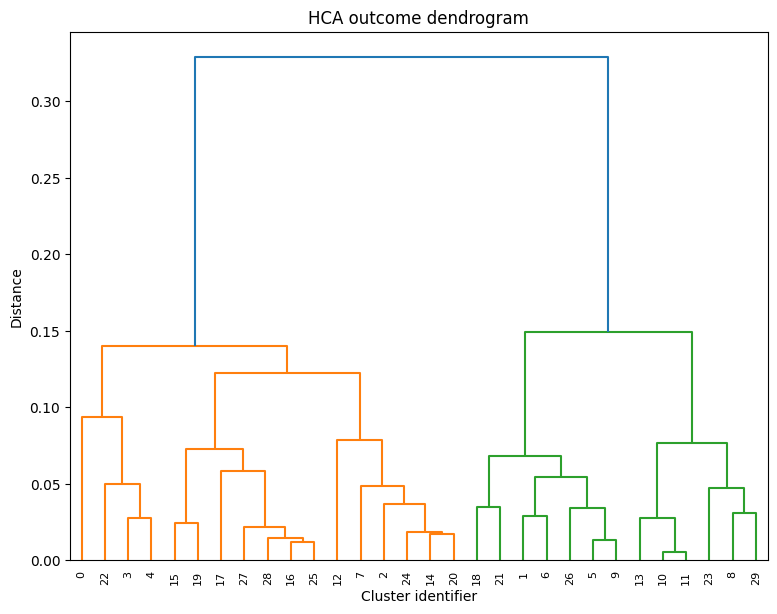

In [16]:
z = session.custom_HCA()
session.dendrogram(z)

Obraz referencyjny przedstawiony poniżej został wyliczony przy pomocy funkcji [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) pochodzącej z pakietu scipy, podpakietu cluster, modułu hierarchy ([scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)).

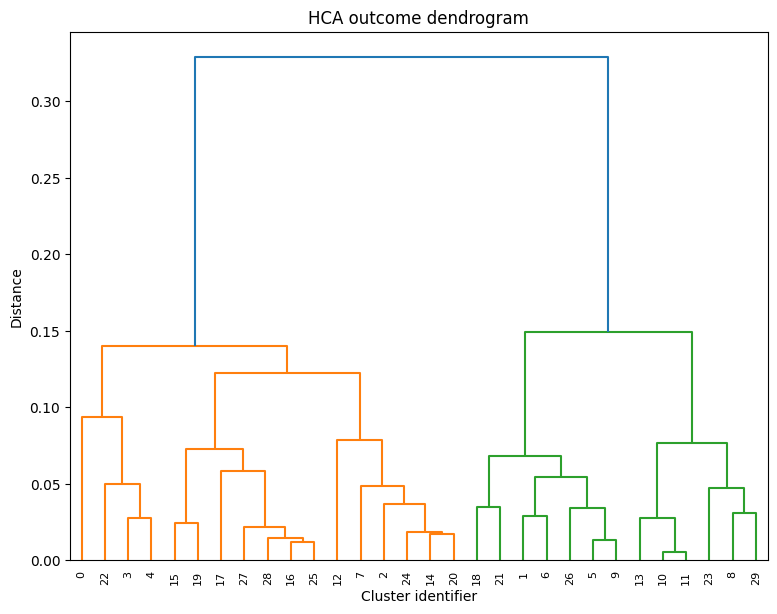

In [17]:
z = session.scipy_HCA()
session.dendrogram(z)

In [18]:
# session.distance_matrix.to_csv("distance_matrix.csv")
# session.distance_matrix.to_excel("distance_matrix.xlsx")

# Porównanie wyników HCA ze względu na dobrane metody i metryki

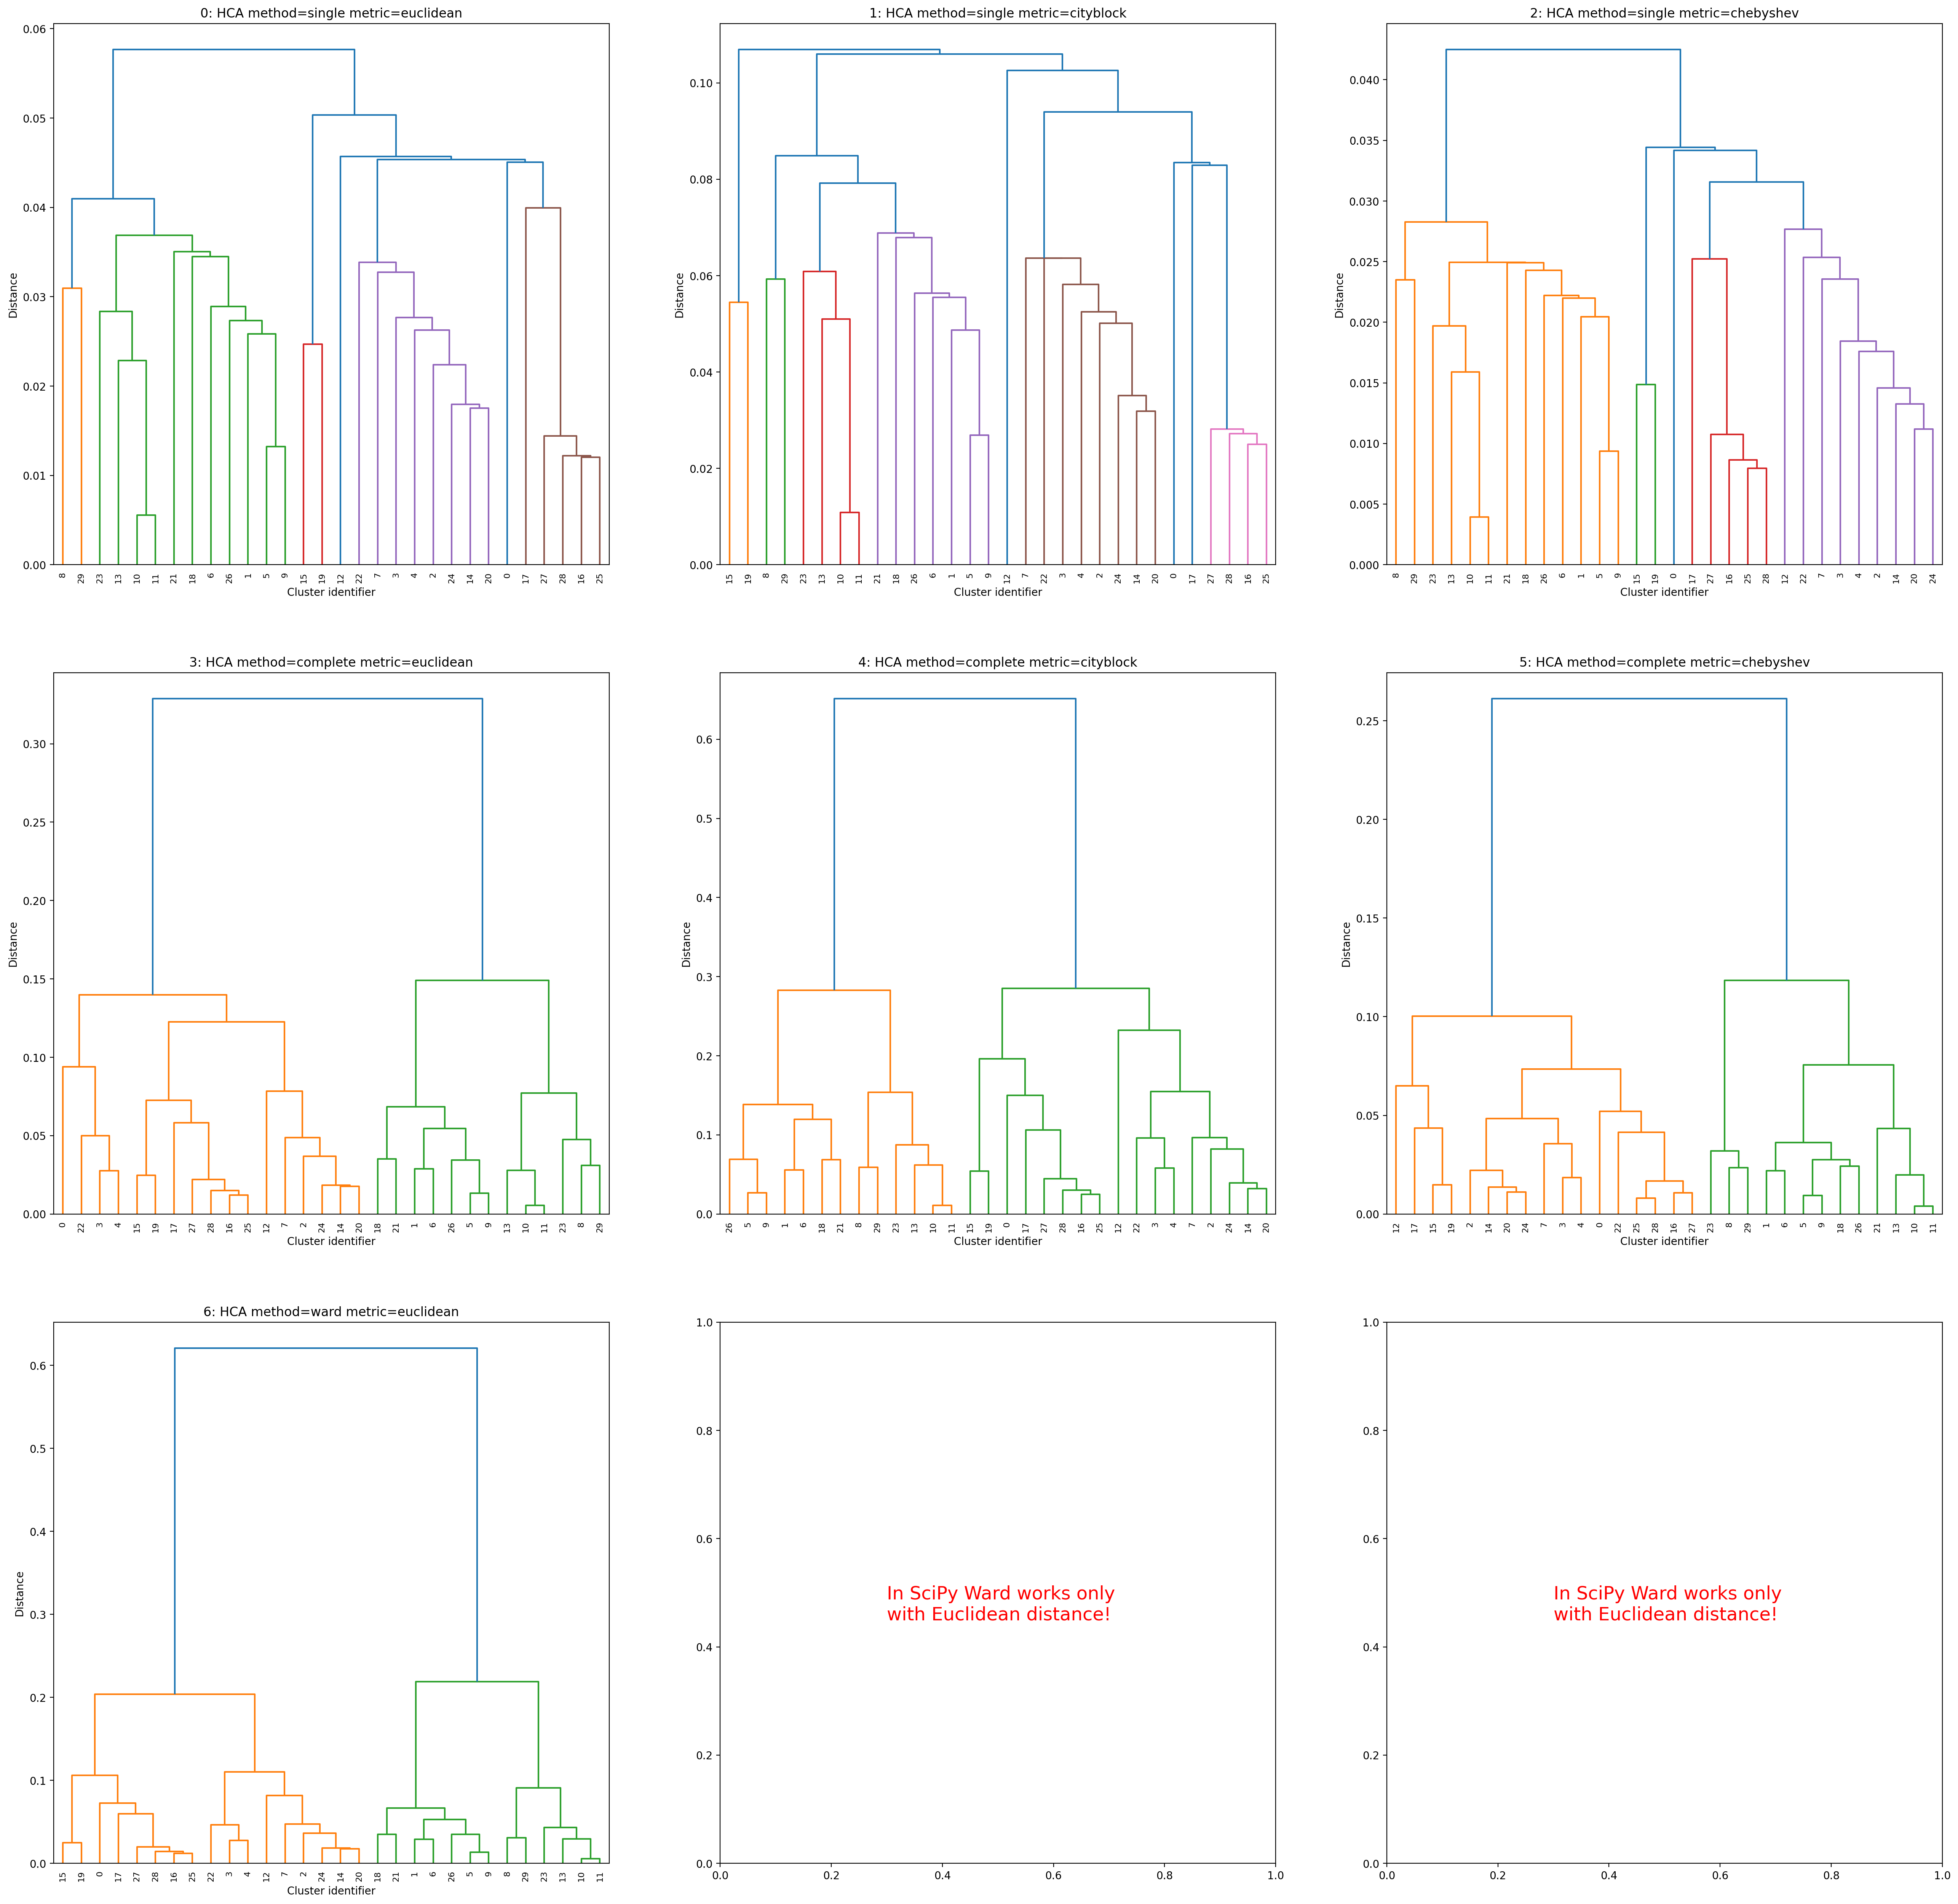

In [19]:
session.dendrogram_grid()

Ze względu na czytelność dendrogramu preferowany jest jeden z wariantów 3, 4, 5 lub 6. HCA przeprowadzone metodą Warda w połączeniu z metryką Euklidesową daje w wyniku najlepiej rozróżnialne 2 klastry i tym samym najlepiej obrazuje naturę podobieństwa danych. Podobny wynik, choć mniej wyrazisty, uzyskujemy przy pomocy complete linkage. Single linkage daje w tym wypdaku wyniki najmniej czytelne.

Metoda Warda przypisuje nowopowstanym klastrom wartości odległości minimalizujące wariancję. Wstępne wartości odległości są liczone metryką Euklidesową, a więc stanowią one pierwiastek sumy kwardartów odległości w poszczególnych wymiarach.

HCA z użyciem powyższej metody składa się z następójących kroków:

-   Dla N obiektów posiadających M atrubutów wyliczamy macierz NxN odległości (każdy od każdego) przy pomocy poniższego wzoru: 
    $$d_E = \sum_{i=0}^{M} (a_{i} - b_{i})^2$$ 
    Gdzie a i b to kolejne pary obiektów.
-   W macierzy odległości znajdujemy parę objektów o najmniejszej odległości, tymczasowo nazwijmy je `A` i `B`
-   Scalamy parę w klaster X<sub>i</sub>.
-   Wiersze odpowiadające obiektom `A` i `B` usuwamy.
-   Do macierzy odległości dodajemy wiersz odpowiadający klastrowi X<sub>i</sub>.
-   Przy pomocy metody Warda wyliczamy wartości odległości dla nowo powstałego klastra. 
    $$a = \frac{n_a + n_c}{n_a + n_b + n_c}$$
    $$b = \frac{n_b + n_c}{n_a + n_b + n_c}$$
    $$c = \frac{-n_c}{n_a + n_b + n_c}$$
    $$ D_{x_c} = a * d_{AC} + b * d_{BC} + c * d_{AB} $$
    n<sub>a</sub> n<sub>b</sub> n<sub>c</sub> - liczebności klastrów, `A`, `B` - obiekty w nowo powstałym klastrze, `C` - klaster względem którego liczymy odległość.

- Jeśli X<sub>i</sub> nie jest jedynym klastrem, cofamy się do kroku drugiego. W przeciwnym razie uzyskliśmy drzewiastą strukturę klastrów która jest wynikiem.

# Interpretacja wyników

Na dendrogramie wykonanym metodą Warda przy użyciu metryki euklidesowej wyraźnie widoczne są dwa klastry, najprawdopodobniej w próbkach znajdowały się dwa rodzaje nasion dyni.

# Opis implementacji algorytmu

### Przygotowanie danych

Dane do analizy przy pomocy tej implementacji algorytmu muszą zostać odpowiednio przygotowane.
Konieczne jest utworzenie klasy dziedziczącej z [optmath.HCA.RecordBase](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/record.py) pasującej do naszych danych. Przykładowo, implementacja dla danych z tego dokumentu wygląda w następujący sposób:

```Python
@dataclass(frozen=True)
class PumpkinSeed(RecordBase):
    Area: float
    Perimeter: float
    Major_Axis_Length: float
    Minor_Axis_Length: float
    Solidity: float
    Roundness: float
```

Dane w postaci [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) muszą zostać:
- konwertowane na numpy.ndarray przy pomocy pandas.DataFrame.to_numpy()
- autoskalowane 
- konwertowane na instancje `PumpkinSeed`
- zamknięte w jedno elementowych klastrach bazowych:

```Python
prepared_data = Cluster.new(PumpkinSeed.new(autoscale(df.to_numpy())))
```
Kolekcję takich klastrów bazowych można wykorzystać dalej do analizy przy pomocy algorytmu.


### Interfejs algorytmu

Głównym interfejsem alogrytmu jest [klasa HCA](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/HCA.py#L82).
Jako argumenty podczas konstrukcji przyjmuje ona dane w postaci klastrów bazowych oraz instancję klasy dziedziczącej z [DistanceSelectorBase](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/distance_selector/selector.py#L13) odpowiadającą za wyliczanie odległości.

```Python
algorithm = HCA(prepared_data, CompleteLinkage(Euclidean()))
```

Aby otrzymać rezultat działania algorytmu wystarczy wywołać metodę HCA.result(), która dokona pełnej redukcji listy klastów do jednego zawierającego wszystkie.
Alternatywne można również dokonać iteracji po stanach algorytmu aby śledzić na bierząco jego postępy.

### Opis przebiegu algorytmu

Po utworzeniu instancja klasy HCA automatycznie wylicza [początkową macierz odległości](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/HCA.py#L90).

Każda iteracja algorytmu tworzy własny obiekt [HCAStep](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/HCA.py#L12) zawierający wszystkie niezbędne dane do redukcji listy klastrów i macierzy odległości.

Redukcja odbywa się w całości w metodzie [HCAStep.reduce()](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/HCA.py#L18) i polega na:

-   wyszukaniu indeksów obiektów o najmniejszej odległości ([metoda HCAStep.\_idexes_to_reduce()](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/HCA.py#L47))
-   Utworzeniu nowej list obiektów zawierającej wszystkie obiekty oprócz redukowanych

-   Utworzeniu nowego klastra zawierającego redukowane obiekty

-   Wyliczeniu nowego wektora odległości dla nowo powstałego klastra ([DistanceSelectorBase.new_distance_vector()](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/distance_selector/selector.py#L20) - [CompleteLinkage](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/distance_selector/complete.py#L11), [SingleLinkage](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/distance_selector/single.py#L11), [Ward](https://github.com/Argmaster/optmath/blob/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/distance_selector/ward.py#L11))

-   Usunięciu wektorów odległości usuniętch obiektów i wstawieniu nowego wektora dla nowego klastra.

Skutkiem tych operacji jest nowy obiekt HCAStep, który zastępóje poprzedni.


### Implementacje metod i metryk

Implementacje metod znajdują się [tutaj](https://github.com/Argmaster/optmath/tree/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/distance_selector), implementacje metryk [tutaj](https://github.com/Argmaster/optmath/tree/bd3fe9b69eadf27fc8952cd883898e27cc7b2508/source/optmath/HCA/distance).

# Przykładowe wykorzystanie implementacji

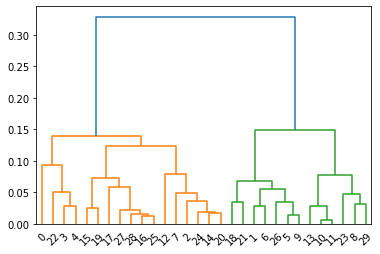

In [20]:
from dataclasses import dataclass
from matplotlib import pyplot as plt
from optmath.HCA import RecordBase, Cluster, HCA, CompleteLinkage, Euclidean
from optmath.HCA.record import autoscale
from scipy.cluster import hierarchy
import pandas


@dataclass(frozen=True)
class PumpkinSeed(RecordBase):
    Area: float
    Perimeter: float
    Major_Axis_Length: float
    Minor_Axis_Length: float
    Solidity: float
    Roundness: float


df = pandas.read_csv("mm_data.csv")
prepared_data = Cluster.new(
    PumpkinSeed.new(
        autoscale(
            df.to_numpy(),
        ),
    ),
)

algorithm = HCA(prepared_data, CompleteLinkage(Euclidean()))
end_cluster = algorithm.result()

z = end_cluster.Z()
hierarchy.dendrogram(z)
plt.show()
